# Community Selection 
This tutorial provides an minimal example for conducting community-level selection with given selection algorthms.

In [1]:
# Community simulator package
from IPython.display import Image
from community_simulator import *
from community_simulator.usertools import *
from community_simulator.visualization import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends import backend_pdf as bpdf
import numpy as np
import scipy as sp
colors = sns.color_palette()
%matplotlib inline

# Community selection package
from community_selection import *
from community_selection.A_experiment_functions import *
from community_selection.B_community_phenotypes import *
from community_selection.C_selection_algorithms import *
from community_selection.D_migration_algorithms import *

cvxpy not installed. Community.SteadyState() not available.


# Library of algorithms
List of algorithms in computing community phenotypes, selection algorithms, and migration algorithms.

In [2]:
make_algorithm_library()

,AlgorithmType,AlgorithmName
0,community_phenotype,f1_community_function_additive
1,community_phenotype,f2_community_function_interaction
2,community_phenotype,f3_community_function_additive_binary
3,community_phenotype,f4_community_function_interaction_binary
4,community_phenotype,f5_invasion_growth
5,community_phenotype,f6_resident_growth
0,selection_algorithm,select_best_n
1,selection_algorithm,no_selection
2,selection_algorithm,mixing_matrix
3,selection_algorithm,pairwise_XZ


# Examples
1. Set up parameters 
2. Make inital state and put together consumer and resource initial states into a plate
3. Simulate the community

Set up the simulation parameters 

In [3]:
# Make dynanmics by default we will use the microbial consumer resource model
def dNdt(N,R,params):
    return MakeConsumerDynamics(assumptions)(N,R,params)
def dRdt(N,R,params):
    return MakeResourceDynamics(assumptions)(N,R,params)
dynamics = [dNdt,dRdt]

# Assumptions
assumptions = a_default.copy() # Start with default parameters
assumptions.update({'n_wells':24, 'c1' :0.1, 'muc':1, 'm':0, "response":"type III",
                    'q': 0.5,
                   'SA': np.concatenate([[10], 60*np.ones(3)]), 'MA': np.concatenate([[10], 30*np.ones(3)])}) # Concatenate to creat a super family
assumptions["sigma"] = 1 # Standard deviation for drawing specifc speices/interaction function
assumptions["alpha"] = 1 # Scaling factor between species- and interaction-specific function variances

# Prepare experiment setup 
params, species_pool, species_function, interaction_function = prepare_experiment(assumptions)

## Simulation parameters
params_simulation = {
    "n_propagation": 24, # Length of propagation, or hours within a growth cycle
    "n_transfer": 5, # Number of transfer, or number of passage
    "dilution": 1/1000, # Dilution factor for transfer
    "pool": species_pool
}

# Control

In [4]:
# Make initial state
init_state = MakeInitialState(assumptions)

# Make plate
plate = Community(init_state, dynamics, params, scale = 10**6, parallel = True) 
setattr(plate, "species_function", species_function)
setattr(plate, "interaction_function", interaction_function)

# Choose the selection algorithms to run
params_algorithm = {"community_phenotype": "f6_resident_growth", "selection_algorithm": "no_selection", "migration_algorithm": "no_migration"}

# Simulation
ctrl_plate_df, ctrl_function_df = simulate_community(plate, assumptions = assumptions, params_simulation = params_simulation, params_algorithm = params_algorithm, write_composition = False)

Transfer 1 done
Transfer 2 done
Transfer 3 done
Transfer 4 done
Transfer 5 done


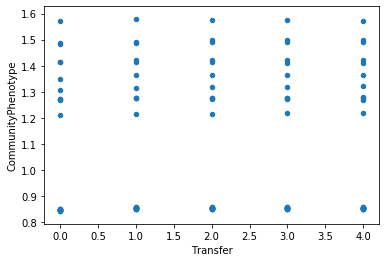

In [5]:
plot_community_function(ctrl_function_df)

## Selection
Select top 25% for example

In [6]:
# Make initial state
init_state = MakeInitialState(assumptions)

# Make plate
plate = Community(init_state, dynamics, params, scale = 10**6, parallel = True) 
setattr(plate, "species_function", species_function)
setattr(plate, "interaction_function", interaction_function)

# Choose the selection algorithms to run
params_algorithm = {"community_phenotype": "f6_resident_growth", "selection_algorithm": "select_best_n", "migration_algorithm": "no_migration"}

# Simulation
selection_plate_df, selection_function_df = simulate_community(plate, assumptions = assumptions, params_simulation = params_simulation, params_algorithm = params_algorithm, write_composition = False)

Transfer 1 done
Transfer 2 done
Transfer 3 done
Transfer 4 done
Transfer 5 done


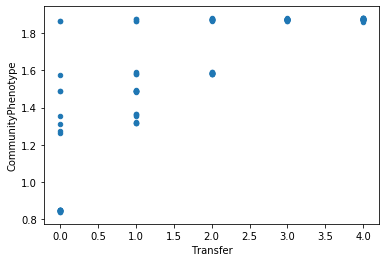

In [7]:
plot_community_function(selection_function_df)

# Make the monoculutre plate 

In [8]:
# Make initial state
N0 = make_synthetic_mono(assumptions)[["W" + str(i) for i  in range(30)]]
init_state = make_initial_state(assumptions, N0)

# Make plate
plate = Community(init_state, dynamics, params, scale = 10**6, parallel = True)
setattr(plate, "species_function", species_function)
setattr(plate, "interaction_function", interaction_function)

# Choose the selection algorithms to run
params_algorithm = {"community_phenotype": "f1_community_function_additive", "selection_algorithm": "no_selection", "migration_algorithm": "no_migration"}

# Simulation
mono_plate, mono_function_df = simulate_community(plate, params_simulation, params_algorithm, write_composition = False)
mono_plate[(mono_plate['Transfer'] == str(2)) & (mono_plate['Type'] == 'consumer')]

KeyError: 'n_transfer'